In [1]:
import os
import pandas as pd
import re
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata.metadata import ACL_metadata
from collections import defaultdict
from itertools import chain
import numpy as np
%matplotlib inline

# import plotly.plotly as py  

# # (*) Useful Python/Plotly tools
# import plotly.tools as tls   

# (*) Graph objects to piece together plots
#from plotly.graph_objs import *
#import plotly 
#plotly.tools.set_credentials_file(username='RamonaComanescu', api_key='ZZR0OIrpZCow6nTAUPR0')
#plotly.offline.init_notebook_mode()
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

def clamp(x): 
    return max(0, min(x, 255))
def get_htmlcol(c):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(c[0]), clamp(c[1]), clamp(c[2]))

colors = [get_htmlcol(tableau20[2]),get_htmlcol(tableau20[0]),get_htmlcol(tableau20[4])]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

%matplotlib inline

np.random.seed(42)

In [2]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

Remember to use acl.modeling_files and modeling_df for topic modeling


In [3]:
print("{0} papers and {1} unique authors".format(df.shape[0],len(acl.auths)))
print("Average papers per authors {0:.2f}".format(df.shape[0]/len(acl.auths)))

23766 papers and 18128 unique authors
Average papers per authors 1.31


In [4]:
LIMIT_PAPERS = 5

In [5]:
fem = 0
mal = 0
total = 0
for i in range(2014,2015):

    year = df[df["year"] == i]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
   
    for auths in papers:
        if(len(auths)==0):
            continue
        if auths[0] in known_f:
            fem += 1
        elif auths[0] in known_m:
            mal +=1
        total += 1

print(fem)
print(mal)
print(total)
print(fem/total)
print(mal/total)

577
1402
2070
0.278743961352657
0.6772946859903382


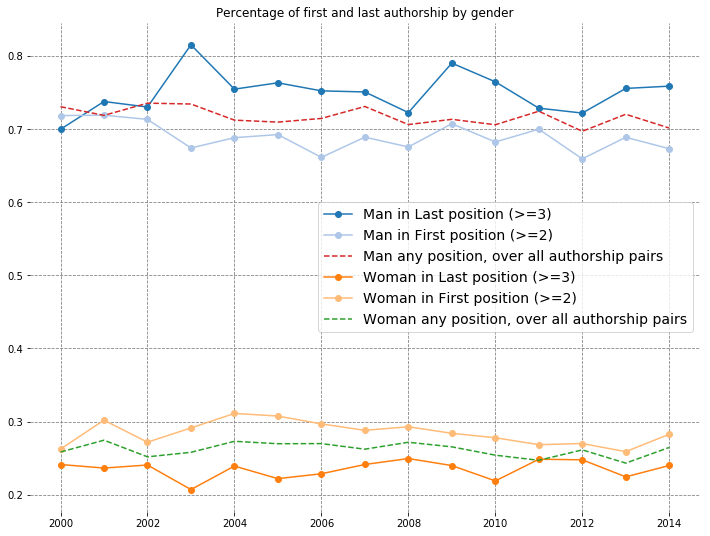

In [6]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
year_range = [2000, 2015]
x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
    year = df[df["year"] == j]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
    fem = 0
    total = 0
    for auths in papers:
        if(len(auths) < 3):
            continue
        if auths[-1] in known_m:
            fem += 1
        total += 1
    yrs.append(j)
    x.append(fem)
    y.append(total)
    #plt.scatter(j, fem/total,  color = colors[0], label="Woman in Last position (>=3)")
            
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'-o', color = tableau20[0], label="Man in Last position (>=3)")


x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
    year = df[df["year"] == j]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
    fem = 0
    total = 0
    for auths in papers:
        if(len(auths) < 3):
            continue
        if auths[0] in known_m:
            fem += 1
        total += 1
    yrs.append(j)
    x.append(fem)
    y.append(total)
    #plt.scatter(j, fem/total,  color = colors[0], label="Woman in Last position (>=3)")
            
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'-o', color = tableau20[1], label="Man in First position (>=2)")

yrs = []
x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
        year = df[df["year"] == j]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]
        fem = 0
        total = 0
        for auths in papers:
            for a in auths:
                if a in known_m:
                    fem += 1
                    
                total += 1
        yrs.append(j)
        x.append(fem)
        y.append(total)
        
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'--', color = tableau20[6], label="Man any position, over all authorship pairs")


x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
    year = df[df["year"] == j]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
    fem = 0
    total = 0
    for auths in papers:
        if(len(auths) < 2):
            continue
        if auths[-1] in known_f:
            fem += 1
        total += 1
    yrs.append(j)
    x.append(fem)
    y.append(total)
    #plt.scatter(j, fem/total,  color = colors[1], label="Woman in First position (>=2)")
            
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'-o', color = tableau20[2], label="Woman in Last position (>=3)")



x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
    year = df[df["year"] == j]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
    fem = 0
    total = 0
    for auths in papers:
        if(len(auths) < 2):
            continue
        if auths[0] in known_f:
            fem += 1
        total += 1
    yrs.append(j)
    x.append(fem)
    y.append(total)
    #plt.scatter(j, fem/total,  color = colors[1], label="Woman in First position (>=2)")
            
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'-o', color = tableau20[3], label="Woman in First position (>=2)")

yrs = []
x = []
y = []
yrs = []
for j in range(year_range[0], year_range[1]):
        year = df[df["year"] == j]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]
        fem = 0
        total = 0
        for auths in papers:
            for a in auths:
                if a in known_f:
                    fem += 1
                    
                total += 1
        yrs.append(j)
        x.append(fem)
        y.append(total)
        
perc_f = np.array(x) / np.array(y)
plt.plot(yrs,perc_f,'--', color = tableau20[4], label="Woman any position, over all authorship pairs")



ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.legend(fontsize=14)
# b=np.arange(year_range[0]-1,year_range[1]+1,2)
# plt.xticks(b, fontsize=13)
# plt.yticks(np.arange(0.06,0.35,0.03))
#plt.ylim(0.06,0.3)
plt.title("Percentage of first and last authorship by gender")
plt.savefig("plots/Positionfirstlastmanwoman.pdf",bbox="tight")
plt.show()

In [30]:
np.array(pos_f)
#np.array(total)

array([5645, 3981, 2151, 1037,  517,  280,  141,   91,   54,   31])

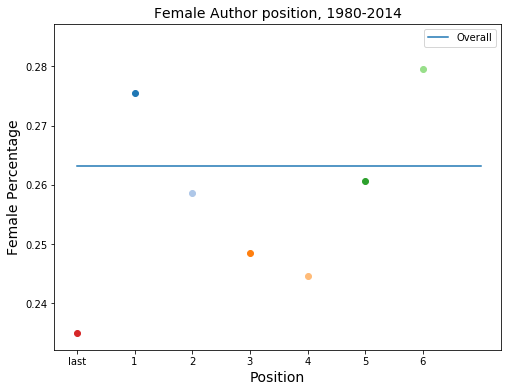

In [72]:
year_range = [1980,2015]
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
yrs = []
x = []
y = []
yrs = []
pos_f = [0] * 10
total = [0] * 10
last_f = 0
total_l = 0
ff = 0
tt = 0
for j in range(year_range[0], year_range[1]):
        year = df[df["year"] == j]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]
        for auths in papers:
            for i in range(0,10):
                if len(auths) < i + 1:
                    continue
                if auths[i] in known_f:
                    pos_f[i] += 1
                    total[i] += 1
                elif auths[i] in known_m:
                    total[i] += 1
                
            if len(auths) >= 3:
                if auths[-1] in known_f:
                    total_l += 1
                    last_f += 1
                elif auths[-1] in known_m:
                    total_l += 1
            for a in auths:
                if a in known_f:
                    ff += 1
                    tt += 1
                elif a in known_m:
                    tt += 1
for i in range(6):
    plt.scatter(i, pos_f[i]/total[i], color=tableau20[i])
plt.scatter(-1, last_f/total_l, color=tableau20[i+1])
plt.plot(list(range(-1,7)), [ff/tt]*8, label="Overall")
plt.xticks([-1,0,1,2,3,4,5],["last","1","2","3","4","5","6"])
plt.xlabel("Position",fontsize=14)
plt.ylabel("Female Percentage",fontsize=14)
plt.title("Female Author position, 1980-2014", fontsize=14)
plt.legend()
plt.savefig("plots/positionsall.pdf")
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
fem = 0
mal = 0
total = 0
pos_f = [0] * 10
pos_total = [0] * 10
for j in range(1990, 2015):
    for i in range(j,j+1):
        year = df[df["year"] == i]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]
        fem = 0
        mal = 0
        total = 0
        for auths in papers:
            for a in auths:
                a += 1
            if(len(auths) < 3 ):
                continue
            if auths[-1] in known_f:
                fem += 1
            elif auths[-1] in known_m:
                mal +=1
        total = fem + mal
        print(fem/total)
    plt.scatter(i, fem/total,color=colors[2])
plt.ylim(0.05,0.5)

In [16]:
yrs = []
x = []
y = []
z = []
n_auths = 0
year_range = [1980,2015]
for j in range(1980, 2015):
    for i in range(j,j+1):
        year = df[df["year"] == i]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]

        for auths in papers:
            n_auths += (len(auths))
            if(len(auths)>10):
                print(auths)

['Biermann,Alanw', 'Rodman,R', 'Ballard,Brucew', 'Betancourt,T', 'Bilbro,G', 'Deas,H', 'Fineman,Linda', 'Fink,Pamelak', 'Krulee,Gilbertk', 'Gregory,D', 'Heidlage,F']
['Austin,Steve', 'Barry,Chris', 'Chow,Yenlu', 'Derr,Alan', 'Kimball,Owen', 'Kubala,Francis', 'Makhoul,John', 'Placeway,Paul', 'Russell,William', 'Schwartz,Richardm', 'Yu,George']
['Black,Ezraw', 'Abney,Steven', 'Flickinger,Danielp', 'Gdaniec,Claudia', 'Grishman,Ralph', 'Harrison,Philip', 'Hindle,Donald', 'Ingria,Robertjp', 'Jelinek,Frederick', 'Klavans,Judithl', 'Liberman,Marky', 'Marcus,Mitchellp', 'Roukos,Salim', 'Santorini,Beatrice', 'Strzalkowski,Tomek']
['Baker,Jamesk', 'Baker,Janetm', 'Bamberg,Paul', 'Bishop,Kathleen', 'Gillick,Laurences', 'Helman,Vera', 'Huang,Zezhen', 'Ito,Yoshiko', 'Lowe,Stephen', 'Peskin,Barbara', 'Roth,Robert', 'Scattone,Francesco']
['Aduriz,Itziar', 'Agirre,Eneko', 'Alegria,Inaki', 'Arregi,Xabier', 'Arriola,Josemaria', 'Artola,Xabier', 'Diazdeilarraza,Arantza', 'Ezeiza,Nerea', 'Maritxalar,Monts

In [17]:
np.sum(n_auths)

61046

In [15]:
from collections import Counter
Counter(pd.Series(n_auths))

Counter({1: 5191,
         2: 7441,
         3: 5162,
         4: 2681,
         5: 1198,
         6: 556,
         7: 247,
         8: 150,
         9: 92,
         10: 54,
         11: 35,
         12: 12,
         13: 9,
         14: 12,
         15: 9,
         16: 1,
         17: 2,
         18: 2,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1})

In [3]:
fem = 0
mal = 0
total = 0
for i in range(2007,2008):

    year = df[df["year"] == i]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
   
    for auths in papers:
        if(len(auths)!=1):
            continue
        if auths[0] in known_f:
            fem += 1
        elif auths[0] in known_m:
            mal +=1
        total += 1

print(fem)
print(mal)
print(total)
print(fem/total)
print(mal/total)

41
122
163
0.25153374233128833
0.7484662576687117


## Average number of singled authored papers in one's career

In [33]:
fem = 0
mal = 0
total = 0
single_women = defaultdict(int)
publ_men = defaultdict(int)
single_men = defaultdict(int)
publ_women = defaultdict(int)
for j in range(1980, 2014):
    for i in range(j,j+1):
        year = df[df["year"] == i]
        #auths = set(chain.from_iterable(year["authors"]))
        papers = year["authors"]

        for auths in papers:

            for a in auths:
                if a == "Beroule,Dominique":
                    print(auths)
                if a in known_f:
                    publ_women[a] += 1
                elif a in known_m:
                    publ_men[a] += 1
            if(len(auths)!=1):
                continue
            if auths[0] in known_f:
                single_women[auths[0]] += 1
            elif auths[0] in known_m:
                single_men[auths[0]] += 1


['Beroule,Dominique']


In [111]:
avg_women = 0
n = 0
for f, count in single_women.items():
    publs = publ_women.get(f,1)
    if publs < 2: continue
    perc = count/publ_women.get(f,count)
    avg_women += perc
    n += 1
    
print(avg_women/n)

0.3306117289082507


In [112]:
avg_men = 0
n = 0
for f, count in single_men.items():
    publs = publ_men.get(f,1)
    if publs < 2: continue
    perc = count/publ_men.get(f,count)
    avg_men += perc
    n += 1
    
print(avg_men/n)

0.35209477805552986


In [31]:
from _name_classification.classifyname import NC
nc = NC()
nc.classify_name("Beroule,Dominique")

(<Gender.female: 1>, 'Beroule,Dominique found with GPeters')

In [12]:
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
pig_girls = defaultdict(list)
positions_girls = defaultdict(list)
n_papers = defaultdict(list)
for i in range(1964,2015):

    year = df[df["year"] == i]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
   
    for auths in papers:
        if(len(auths)==0):
            continue
        auths = set(auths)
        for p,a in enumerate(auths):

            if a in known_f: 
                girls[i].add(a)
                pig_girls[a].append(i)
                if len(auths) == 1:
                    positions_girls[a].append("solo")
                elif p == 0 :
                    positions_girls[a].append("first")
                elif p == len(auths) - 1:
                    positions_girls[a].append("last")
                else:
                    positions_girls[a].append("middle")
            elif a in known_m: 
                boys[i].add(a)
#girls who publishes more than 5 papers and have been in the field more than 5 years
girls_dict = []
for i,g in enumerate(pig_girls):
    j = i + 3
    n = len(pig_girls[g])
    if n > LIMIT_PAPERS:
        if(pig_girls[g][-1]-pig_girls[g][0]>5):
            girls_dict.append((g,pig_girls[g],positions_girls[g]))

35


741

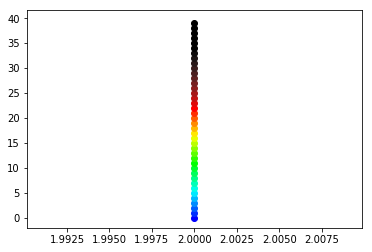

In [6]:
from colour import Color
colors =  list(Color("blue").range_to(Color("red"),23)) + list((Color("red").range_to(Color("black"),13)))[1:]
for i in range(40):
    plt.scatter(2,i,color=colors[min(i,len(colors)-1)].rgb)
print(len(colors))   
len(girls_dict)

In [56]:
pig_girls

defaultdict(list,
            {'Cordier,Brigitte': [1965],
             'Pendergraft,Ed': [1965],
             'Robinson,Janej': [1965, 1967, 1979, 1979, 1981, 1982, 1983],
             'Tosh,Lw': [1965],
             'Szanser,Ajm': [1967, 1969],
             'Hiz,Danuta': [1967],
             'Masterman,Margaret': [1967],
             'Sager,Naomi': [1967, 1979, 1979, 1982, 1997],
             'Borillo,Andree': [1967],
             'Gladky,Av': [1969],
             'Friedman,Joyce': [1969, 1979, 1979, 1986, 1986],
             'Bellert,Irena': [1969],
             'Dostert,Bozena': [1969],
             'Dougherty,Chingyi': [1969],
             'Montgomery,Christinea': [1969,
              1979,
              1982,
              1983,
              1991,
              1991,
              1991,
              1992,
              1992,
              1993],
             'Yang,Charlottew': [1969],
             'Fromkin,Victoriaa': [1969],
             'Gopnik,Myrna': [1969],
             'F

In [64]:
girls_papers = 0
girls_solo_papers = 0
girls_first_papers = 0
girls_last_papers = 0
for girl in pig_girls.keys():
    papers = positions_girls[girl]
    girls_papers += len(papers)
    girls_solo_papers += len(list(filter(lambda x: x=="solo",papers)))
    girls_first_papers += len(list(filter(lambda x: x=="first",papers)))
    girls_last_papers += len(list(filter(lambda x: x=="last",papers)))

In [65]:
print("Percentage of solo papers for women: {0:.2f}%".format(girls_solo_papers/girls_papers*100))
print("Percentage of first author papers for women: {0:.2f}%".format(girls_first_papers/girls_papers*100))
print("Percentage of last author papers for women: {0:.2f}%".format(girls_last_papers/girls_papers*100))

Percentage of solo papers for women: 8.25%
Percentage of first author papers for women: 28.98%
Percentage of last author papers for women: 29.22%


In [66]:
ranges = [(1,6),(6,11),(11,21),(21,51),(51,101),(100,200)]
counts_girls = [0] * len(ranges)
solo_counts_girls = [[]] * len(ranges)
for girl in pig_girls.keys():
    papers = positions_girls[girl]
    n = len(papers)
    for i,r in enumerate(ranges):
        if n in range(r[0],r[1]):
            counts_girls[i] += 1
            solo_counts_girls[i] += len(list(filter(lambda x: x=="solo",papers)))
            break

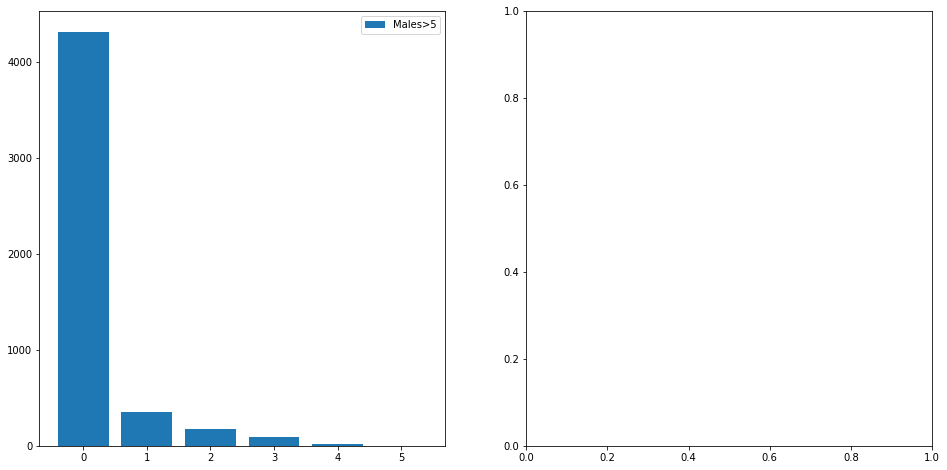

In [74]:
fix, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].bar(range(len(counts_girls)),counts_girls,label="Males>5")
ax[0].legend()


In [7]:
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
pig_girls = defaultdict(list)
positions_girls = defaultdict(list)
n_papers = defaultdict(list)
for i in range(1964,2015):
    year = df[df["year"] == i]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
   
    for auths in papers:
        if(len(auths)==0):
            continue
        auths = set(auths)
        for p,a in enumerate(auths):

            if a in known_m: 
                girls[i].add(a)
                pig_girls[a].append(i)
                if len(auths) == 1:
                    positions_girls[a].append("solo")
                elif p == 0 :
                    positions_girls[a].append("first")
                elif p == len(auths) - 1:
                    positions_girls[a].append("last")
                else:
                    positions_girls[a].append("middle")
            elif a in known_m: 
                boys[i].add(a)
#girls who publishes more than 5 papers and have been in the field more than 5 years
girls_dict = []
for i,g in enumerate(pig_girls):
    j = i + 3
    n = len(pig_girls[g])
    if n > LIMIT_PAPERS:
        if(pig_girls[g][-1]-pig_girls[g][0]>5):
            girls_dict.append((g,pig_girls[g],positions_girls[g]))


In [8]:
girls_papers = 0
girls_solo_papers = 0
girls_first_papers = 0
girls_last_papers = 0
for girl in pig_girls.keys():
    papers = positions_girls[girl]
    girls_papers += len(papers)
    girls_solo_papers += len(list(filter(lambda x: x=="solo",papers)))
    girls_first_papers += len(list(filter(lambda x: x=="first",papers)))
    girls_last_papers += len(list(filter(lambda x: x=="last",papers)))

In [62]:
print("Percentage of solo papers for men: {0:.2f}%".format(girls_solo_papers/girls_papers*100))
print("Percentage of first author papers for men: {0:.2f}%".format(girls_first_papers/girls_papers*100))
print("Percentage of last author papers for men: {0:.2f}%".format(girls_last_papers/girls_papers*100))

Percentage of solo papers for men: 9.34%
Percentage of first author papers for men: 28.93%
Percentage of last author papers for men: 28.86%


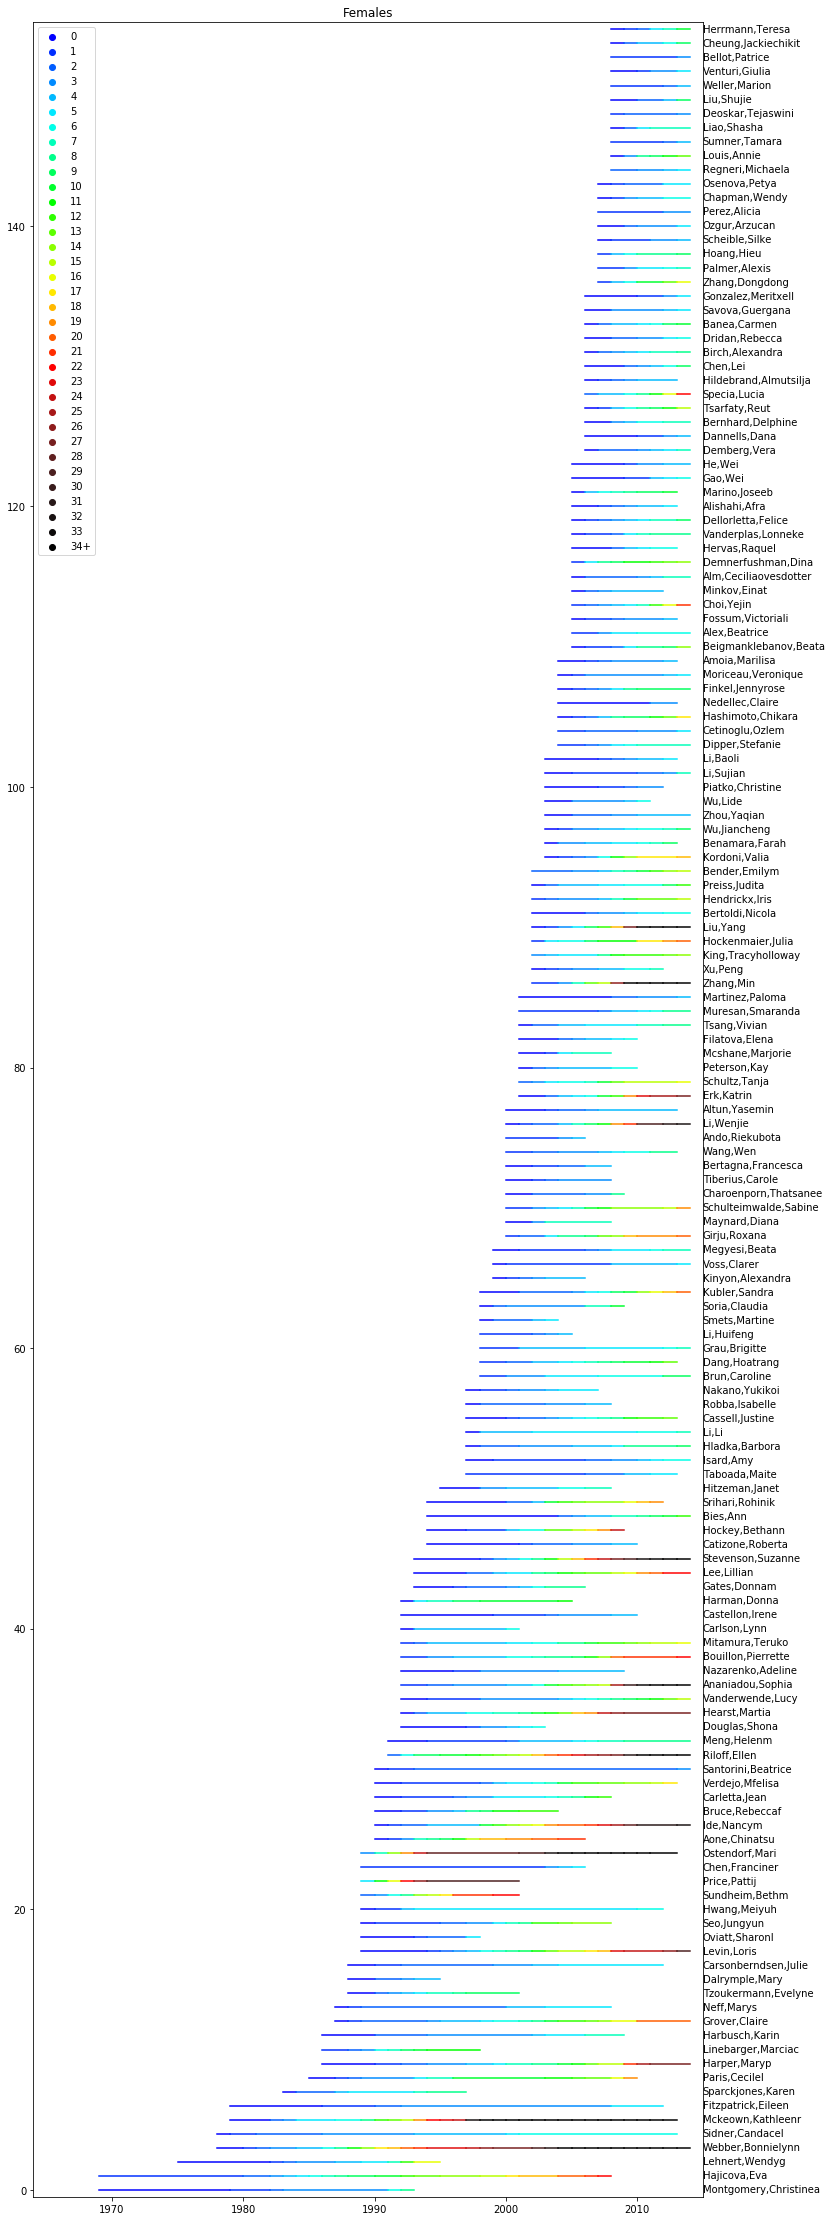

In [20]:
plt.figure(figsize=(12, 40))
ax = plt.subplot(111)
k = 0
np.random.seed(42)
for i, t in enumerate(girls_dict):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.7 and g != "Webber,Bonnielynn":
        continue
    yrs = t[1]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    for j,yr in enumerate(yrs[:-1]):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
       
        plt.plot([yr, yrs[j+1]], [k] * 2, '-', color = colors[min(j,len(colors)-1)].rgb)
    plt.text(2015, k - 0.2, g)
    k += 1
    
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(1964,2015)
ax.set_title("Females")
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(0,0,color=colors[i].rgb, label = lgn)
plt.legend()
plt.savefig("plots/FemalesGradientsNoLimits.pdf",bbox_inches="tight")



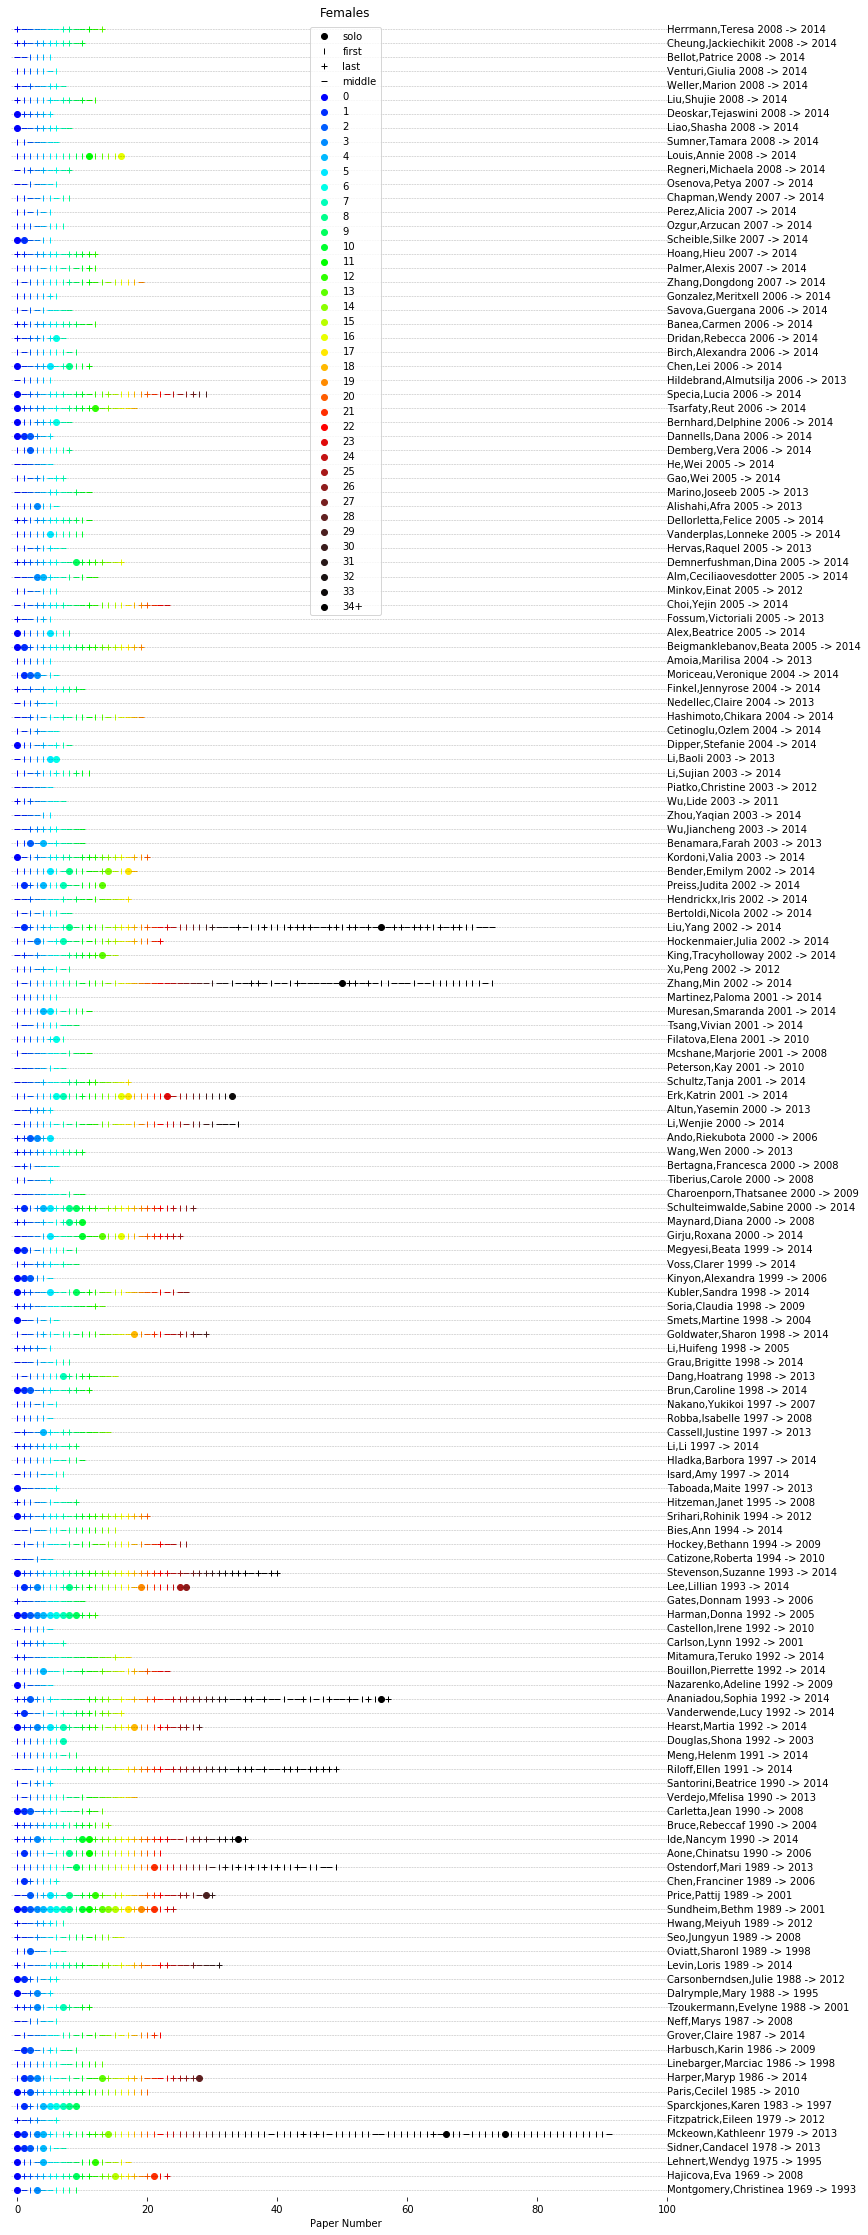

In [23]:
plt.figure(figsize=(12, 40))
ax = plt.subplot(111)
np.random.seed(42)
k = 0
max_pub = 0
for i, t in enumerate(girls_dict[:-1]):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.7 and g != "Goldwater,Sharon":
        continue
    yrs = t[1]
    pos = t[2]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    #plt.plot(range(0,len(yrs)), [k] * len(yrs))
    for j,yr in enumerate(yrs):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
        ls = '_'
        if pos[j] == 'solo':
            ls = 'o'
        elif pos[j] == 'first':
            ls = '|'
        elif pos[j] == "last":
            ls = '+'
            
        plt.plot(j, k, ls, color = colors[min(j,len(colors)-1)].rgb)
    max_pub = max(max_pub,j)
    plt.text(100, k - 0.2, g + " " + str(yrs[0]) + " -> " + str(yrs[-1]))
    k += 1
for y in range(0, k, 1):    
    plt.plot(range(-1, max_pub+11), [y] * len(range(-1,max_pub+11)), "--", lw=0.5, color="black", alpha=0.3)
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(-1,max_pub+11)
ax.set_title("Females")
ax.set_xlabel("Paper Number")
ax.set_yticks([])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(-5,-5,color=colors[i].rgb, label = lgn)
plt.plot(-5,-5,'o', label = "solo", color = 'black')
plt.plot(-5,-5,'|', label = "first", color = 'black')
plt.plot(-5,-5,'+', label = "last", color = 'black')
plt.plot(-5,-5,'_', label = "middle", color = 'black')
plt.legend()
plt.savefig("plots/FemalesGradientsFirstLastNoLimits.pdf", bbox_inches="tight")
plt.show()


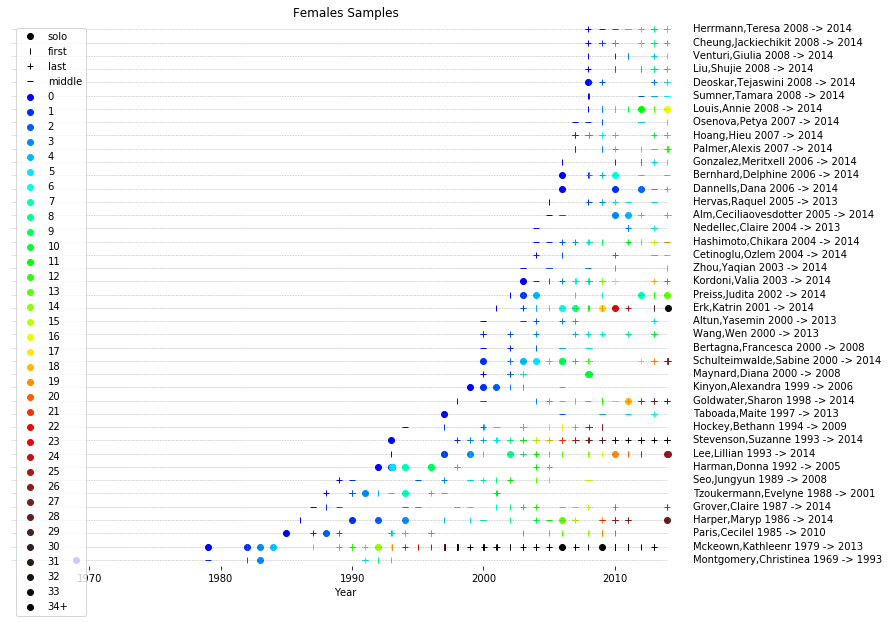

In [22]:
plt.figure(figsize=(12, 0))
ax = plt.subplot(111)
np.random.seed(42)
k = 0
max_pub = 0
for i, t in enumerate(girls_dict[:-1]):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.7 and g != "Goldwater,Sharon":
        continue
    yrs = t[1]
    pos = t[2]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    #plt.plot(range(0,len(yrs)), [k] * len(yrs))
    last = None
    c = 0
    for j,yr in enumerate(yrs):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
        ls = '_'
        if pos[j] == 'solo':
            ls = 'o'
        elif pos[j] == 'first':
            ls = '|'
        elif pos[j] == "last":
            ls = '+'
        if yr == last:
            c += 1
        else:
            c = 0
            last = yr
        plt.plot(yr + c/100, k, ls, color = colors[min(j,len(colors)-1)].rgb)
    max_pub = max(max_pub,j)
    plt.text(2016, k - 0.2, g + " " + str(yrs[0]) + " -> " + str(yrs[-1]))
    k += 1
for y in range(0, k, 1):    
    plt.plot(range(1964, 2015), [y] * len(range(1964,2015)), "--", lw=0.5, color="black", alpha=0.3)
ax.set_ylim(-0.5, k-0.5)
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(1964,2015)
#ax.set_xlim(-1,max_pub+11)
ax.set_title("Females")
ax.set_xlabel("Year")
ax.set_yticks([])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(-5,-5,color=colors[i].rgb, label = lgn)
plt.plot(-5,-5,'o', label = "solo", color = 'black')
plt.plot(-5,-5,'|', label = "first", color = 'black')
plt.plot(-5,-5,'+', label = "last", color = 'black')
plt.plot(-5,-5,'_', label = "middle", color = 'black')
plt.legend()
plt.savefig("plots/FemalesGradientsFirstLastGapsNoLimits.pdf", bbox_inches="tight")
plt.show()


In [ ]:
#girls_dict = sorted(girls_dict, key = lambda x: len(x[1]))

In [ ]:
print("Max number of papers:",len(girls_dict[-1][1]))

In [ ]:
py_fig1 = tls.mpl_to_plotly(mpl_fig1, verbose=False, strip_style=False)
py.iplot(py_fig1, filename='Progression.pdf')

## Males

In [24]:
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
pig_girls = defaultdict(list)
positions_girls = defaultdict(list)
n_papers = defaultdict(list)
for i in range(1964,2015):
    year = df[df["year"] == i]
    #auths = set(chain.from_iterable(year["authors"]))
    papers = year["authors"]
   
    for auths in papers:
        if(len(auths)==0):
            continue
        auths = set(auths)
        for p,a in enumerate(auths):

            if a in known_m: 
                girls[i].add(a)
                pig_girls[a].append(i)
                if len(auths) == 1:
                    positions_girls[a].append("solo")
                elif p == 0 :
                    positions_girls[a].append("first")
                elif p == len(auths) - 1:
                    positions_girls[a].append("last")
                else:
                    positions_girls[a].append("middle")
            elif a in known_m: 
                boys[i].add(a)
#girls who publishes more than 5 papers and have been in the field more than 5 years
girls_dict = []
for i,g in enumerate(pig_girls):
    j = i + 3
    n = len(pig_girls[g])
    if n > LIMIT_PAPERS:
        if(pig_girls[g][-1]-pig_girls[g][0]>5):
            girls_dict.append((g,pig_girls[g],positions_girls[g]))


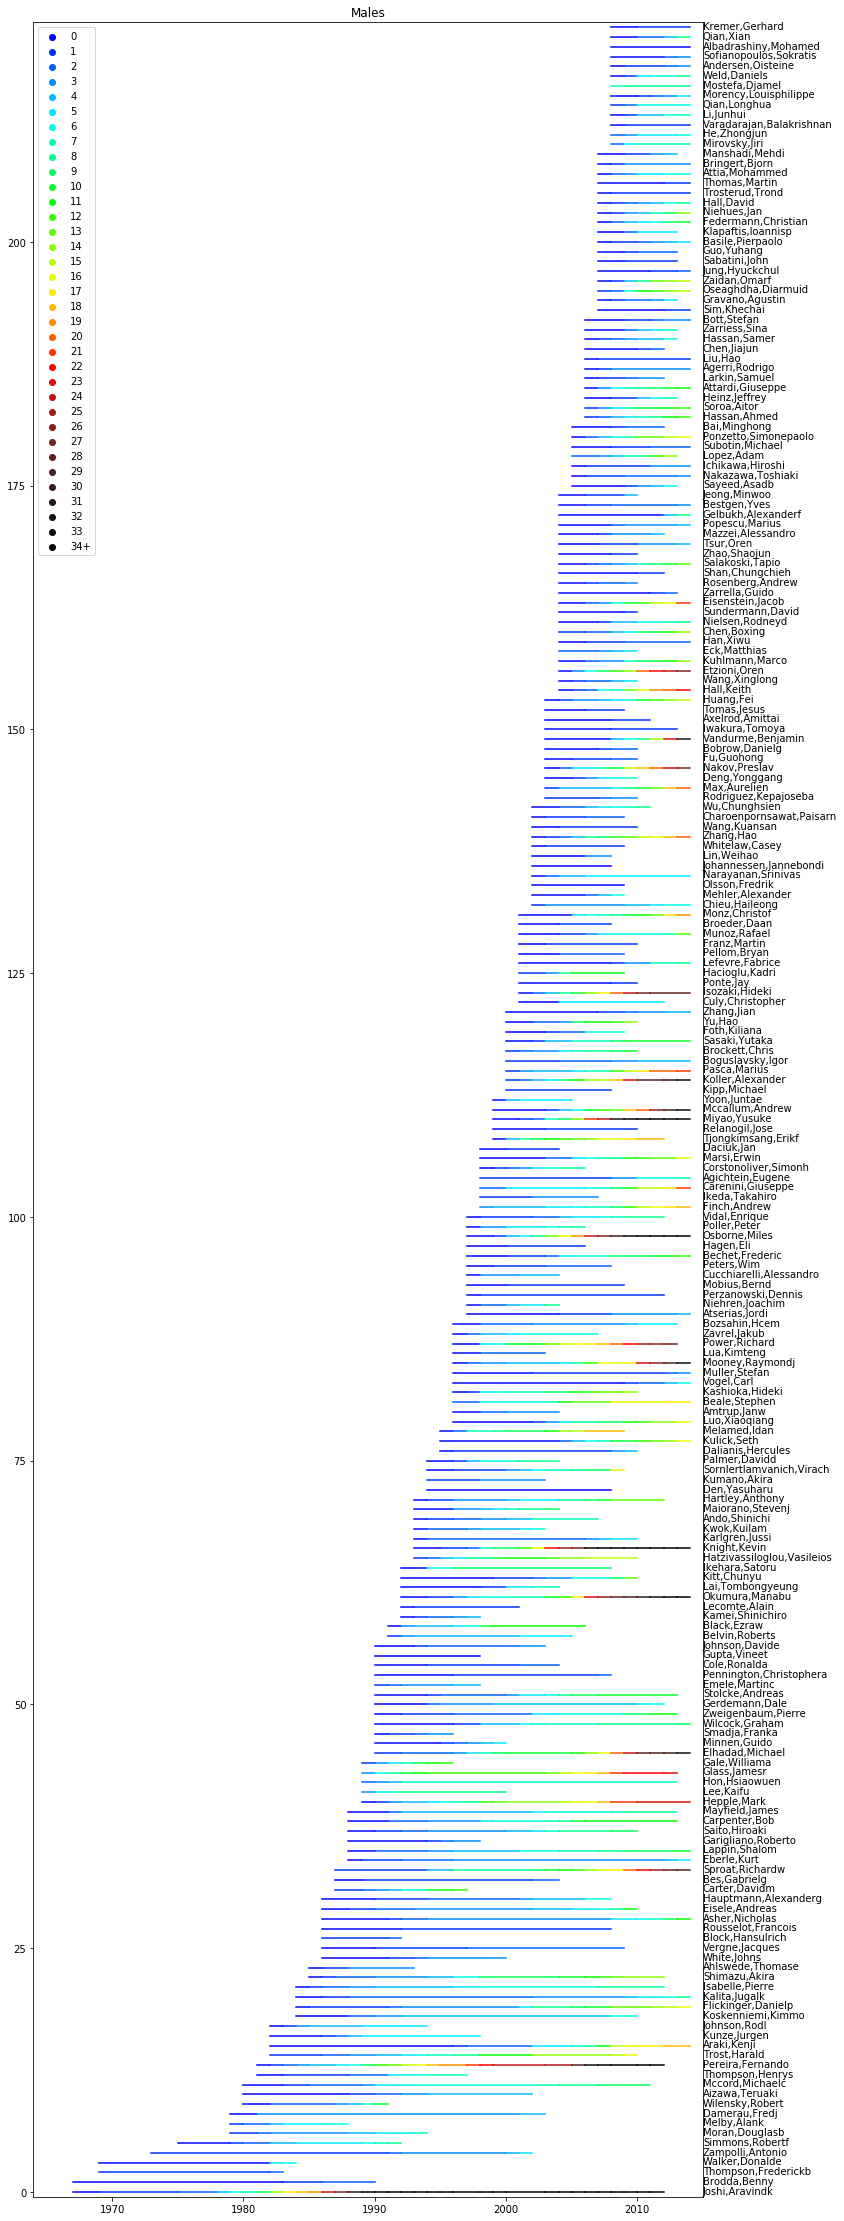

In [100]:
plt.figure(figsize=(12, 40))
ax = plt.subplot(111)
k = 0
for i, t in enumerate(girls_dict):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.90 and g != "Lopez,Adam":
        continue
    yrs = t[1]
    for j,yr in enumerate(yrs[:-1]):
        plt.plot([yr, yrs[j+1]], [k] * 2, '-', color = colors[min(j,len(colors)-1)].rgb)
    plt.text(2015, k - 0.2, g)
    k += 1
    
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(1964,2015)
ax.set_title("Males")
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(0,0,color=colors[i].rgb, label = lgn)
plt.legend()
plt.savefig("plots/MalesGradientsNoLimits.pdf")

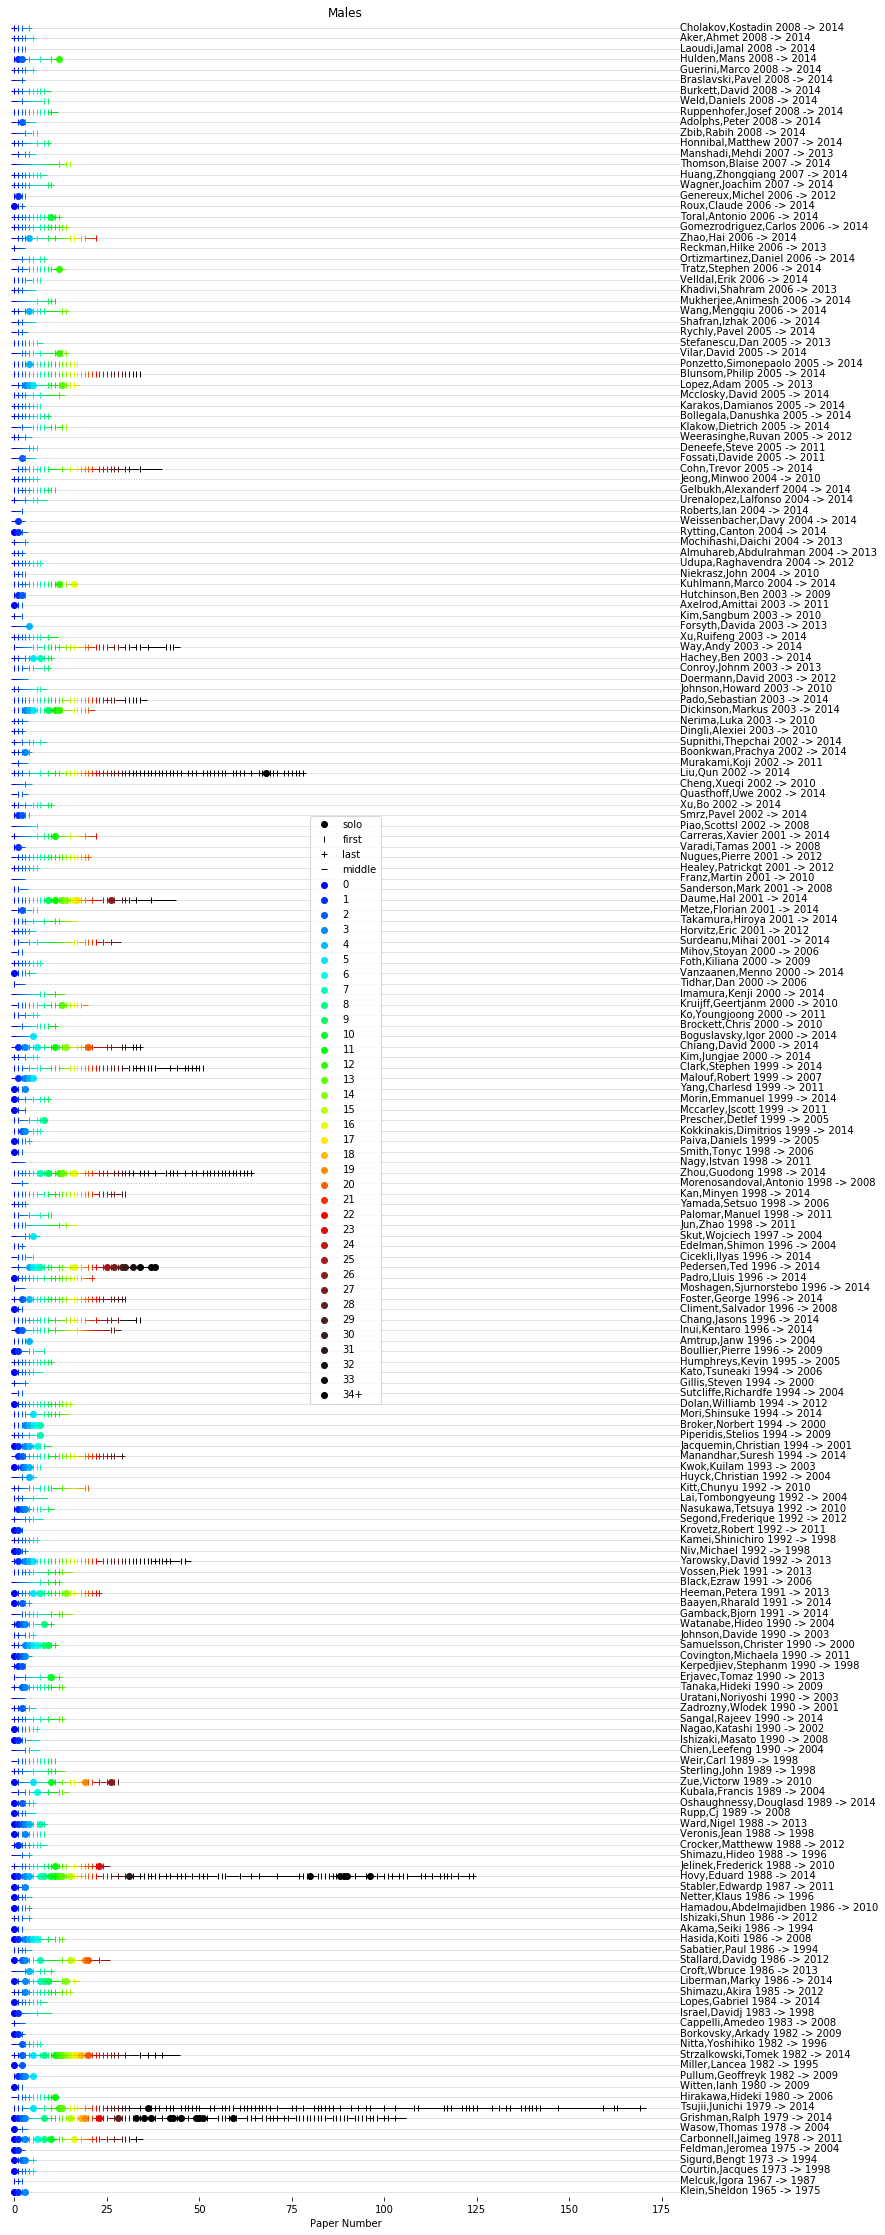

In [105]:
plt.figure(figsize=(12,40))
ax = plt.subplot(111)
np.random.seed(42)
k = 0
max_pub = 0
for i, t in enumerate(girls_dict):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.90 and g != "Lopez,Adam":
        continue
    yrs = t[1]
    pos = t[2]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    for j,yr in enumerate(yrs):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
        ls = '_'
        if pos[j] == 'solo':
            ls = 'o'
        elif pos[j] == 'first':
            ls = '|'
        elif pos[j] == "last":
            ls = '+'
            
        plt.plot(j, k, ls, color = colors[min(j,len(colors)-1)].rgb)
    max_pub = max(max_pub,j)
    plt.text(180, k - 0.2, g + " " + str(yrs[0]) + " -> " + str(yrs[-1]))
    k += 1
    
for y in range(0, k, 1):    
    plt.plot(range(-1, max_pub+11), [y] * len(range(-1,max_pub+11)), "--", lw=0.5, color="black", alpha=0.3)    
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(-1,max_pub+10)
ax.set_title("Males")
ax.set_xlabel("Paper Number")
ax.set_yticks([])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(-5,-5,color=colors[i].rgb, label = lgn)
plt.plot(-5,-5,'o', label = "solo", color = 'black')
plt.plot(-5,-5,'|', label = "first", color = 'black')
plt.plot(-5,-5,'+', label = "last", color = 'black')
plt.plot(-5,-5,'_', label = "middle", color = 'black')
plt.legend()
plt.savefig("plots/MalesGradientsFirstLastNoLimits.pdf", bbox_inches="tight")
plt.show()


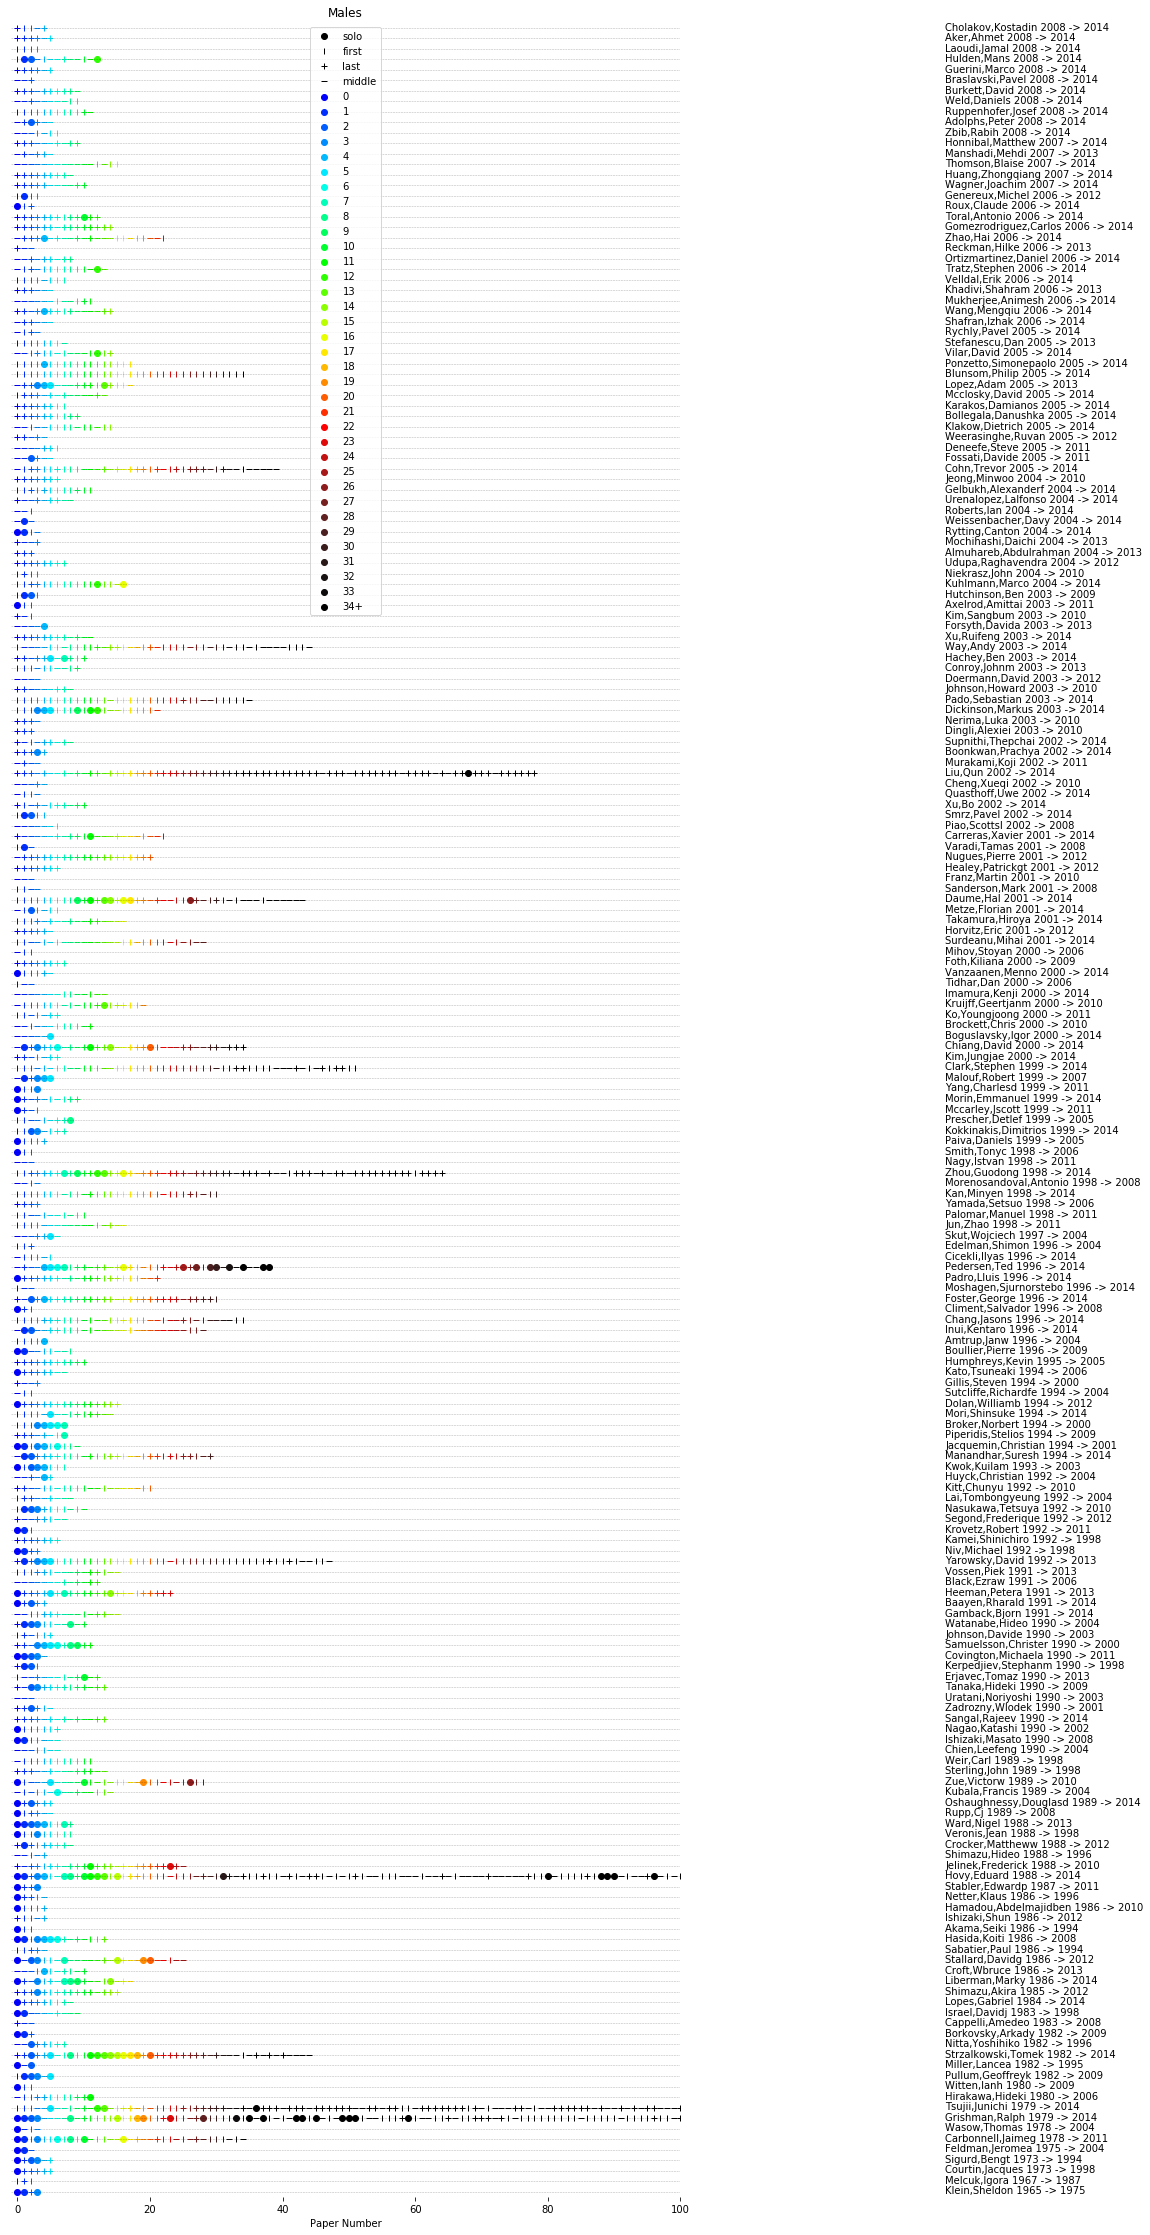

In [108]:
plt.figure(figsize=(12,40))
ax = plt.subplot(111)
np.random.seed(42)
k = 0
max_pub = 0
for i, t in enumerate(girls_dict):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.90 and g != "Lopez,Adam":
        continue
    yrs = t[1]
    pos = t[2]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    for j,yr in enumerate(yrs):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
        ls = '_'
        if pos[j] == 'solo':
            ls = 'o'
        elif pos[j] == 'first':
            ls = '|'
        elif pos[j] == "last":
            ls = '+'
            
        plt.plot(j, k, ls, color = colors[min(j,len(colors)-1)].rgb)
    max_pub = max(max_pub,j)
    plt.text(140, k - 0.2, g + " " + str(yrs[0]) + " -> " + str(yrs[-1]))
    k += 1
    
for y in range(0, k, 1):    
    plt.plot(range(-1, 140), [y] * len(range(-1,140)), "--", lw=0.5, color="black", alpha=0.3)    
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(-1,100)
ax.set_title("Males")
ax.set_xlabel("Paper Number")
ax.set_yticks([])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(-5,-5,color=colors[i].rgb, label = lgn)
plt.plot(-5,-5,'o', label = "solo", color = 'black')
plt.plot(-5,-5,'|', label = "first", color = 'black')
plt.plot(-5,-5,'+', label = "last", color = 'black')
plt.plot(-5,-5,'_', label = "middle", color = 'black')
plt.legend()
plt.savefig("plots/MalesGradientsFirstLastNoLimitsScaleDown.pdf", bbox_inches="tight")
plt.show()


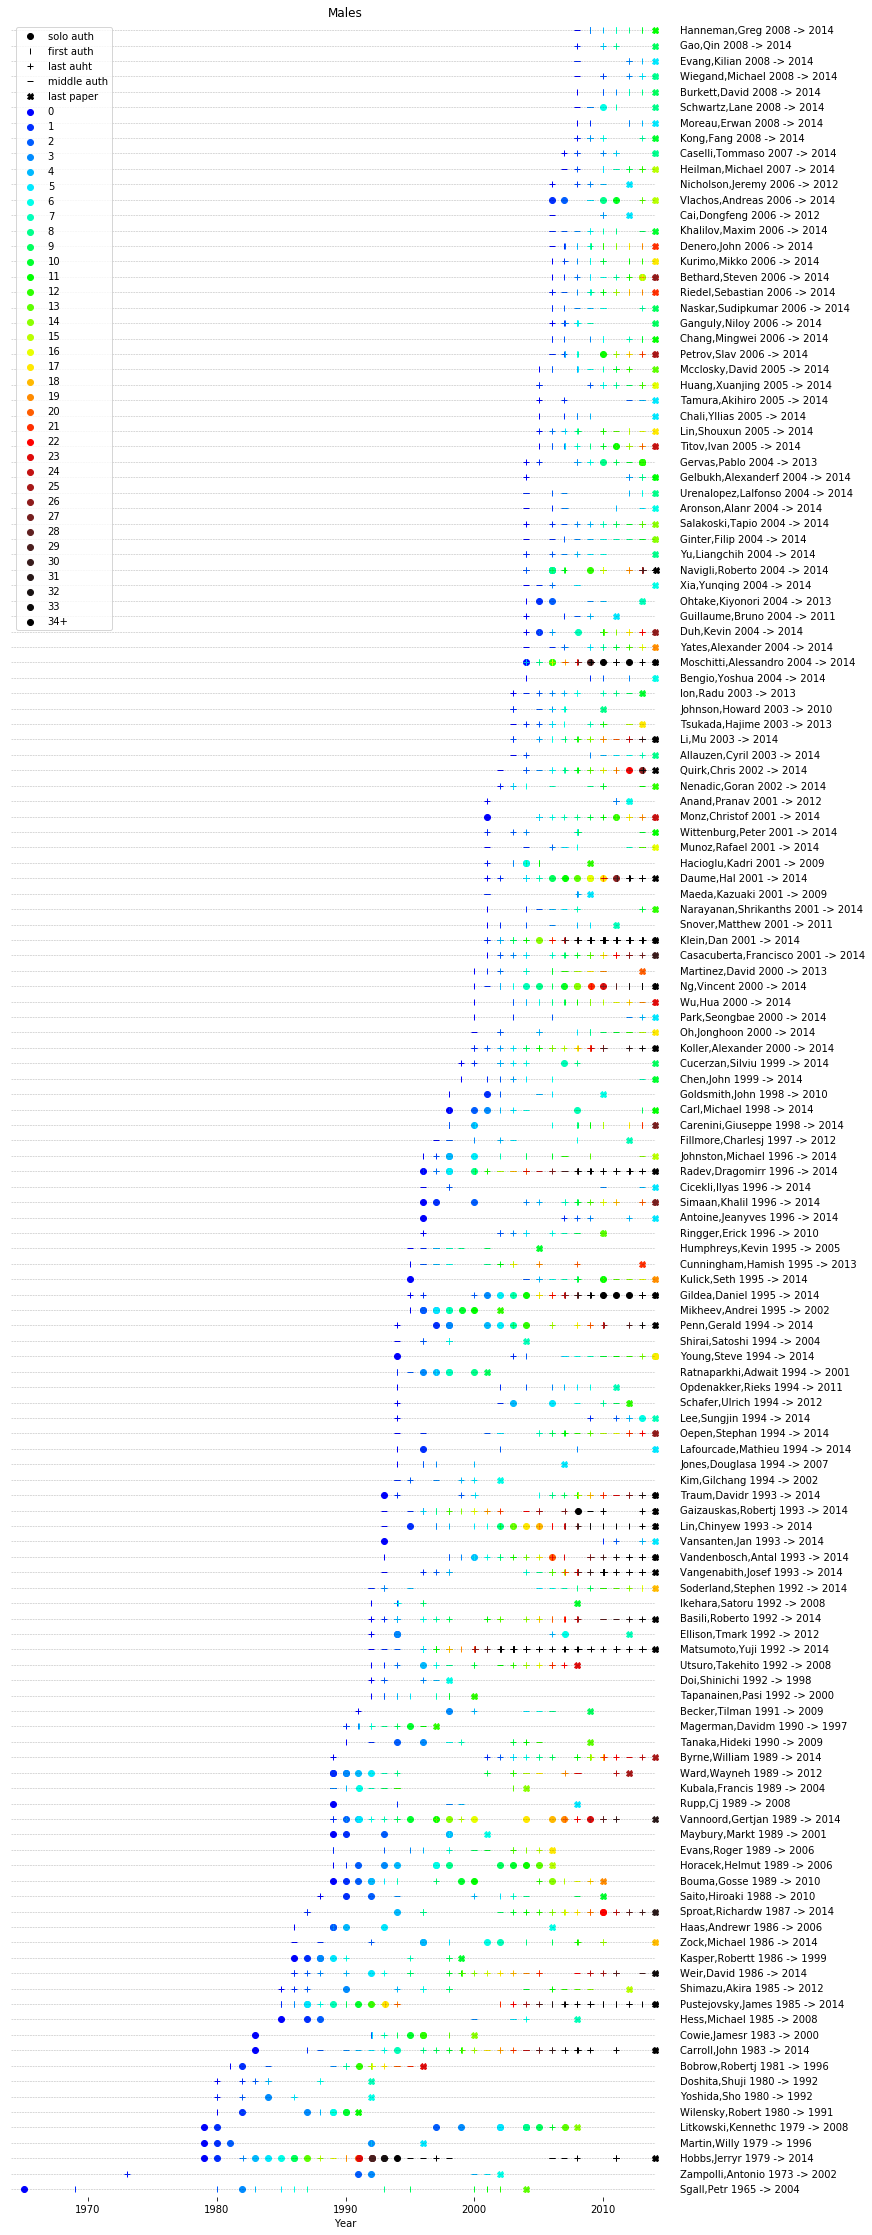

In [25]:
plt.figure(figsize=(12, 40))
ax = plt.subplot(111)
np.random.seed(42)
k = 0
max_pub = 0
for i, t in enumerate(girls_dict[:-1]):
    proba = np.random.uniform(0,1)
    g = t[0]
    if proba < 0.90 and g != "Goldwater,Sharon":
        continue
    yrs = t[1]
    pos = t[2]
    #plt.plot(girls_dict[g], [i] * len(girls_dict[g]), '-', lw= 1, label = g, color = 'black')
    #base_color = tableau20[i%20]
    #plt.plot(range(0,len(yrs)), [k] * len(yrs))
    last = None
    c = 0
    for j,yr in enumerate(yrs):
        #col = (min(1,base_color[0] + j * 1e-1), min(1,base_color[1] + j * 1e-2), min(1,base_color[2] + j * 1e-2))
        ls = '_'
        if pos[j] == 'solo':
            ls = 'o'
        elif pos[j] == 'first':
            ls = '|'
        elif pos[j] == "last":
            ls = '+'
            
        if j == len(yrs) - 1:
            ls = "X"
            
        if yr == last:
            c += 1
        else:
            c = 0
            last = yr
        plt.plot(yr + c/100, k, ls, color = colors[min(j,len(colors)-1)].rgb)
    max_pub = max(max_pub,j)
    plt.text(2016, k - 0.2, g + " " + str(yrs[0]) + " -> " + str(yrs[-1]))
    k += 1
for y in range(0, k, 1):    
    plt.plot(range(1964, 2015), [y] * len(range(1964,2015)), "--", lw=0.5, color="black", alpha=0.3)
ax.set_ylim(-0.5, k-0.5)
ax.set_xlim(1964,2016)
#ax.set_xlim(-1,max_pub+11)
ax.set_title("Males")
ax.set_xlabel("Year")
ax.set_yticks([])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  
for i in range(len(colors)):
    lgn = i
    if i == len(colors) - 1:
        lgn = str(lgn) + "+"
    plt.scatter(-5,-5,color=colors[i].rgb, label = lgn)
plt.plot(-5,-5,'o', label = "solo auth", color = 'black')
plt.plot(-5,-5,'|', label = "first auth", color = 'black')
plt.plot(-5,-5,'+', label = "last auht", color = 'black')
plt.plot(-5,-5,'_', label = "middle auth", color = 'black')
plt.plot(-5,-5,'X', label = "last paper", color = 'black')
plt.legend()
plt.savefig("plots/MalesGradientsFirstLastGapsNoLimits.pdf", bbox_inches="tight")
plt.show()
